<a href="https://colab.research.google.com/github/Itsalyce/projet_2cs/blob/master/Differential_Privacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy pandas scipy matplotlib jupyter opendp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 119.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.7 MB/s eta 0:00:00


In [ ]:
pip install diffprivlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.9/176.9 kB 1.8 MB/s eta 0:00:00


In [ ]:
pip install pydp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 103.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.2/143.2 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.8/129.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.1/331.1 kB 19.4 MB/s eta 0:00:00
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566166 sha256=9b5b52d60b5358f2cb8bcc0396c05c75512b2439827baaab92c48c3cef5dd548
  Stored in directory: /root/.cache/pip/wheels/8f/47/c8/f44c5aebb7507f7c8a2c0bd23151d732d0f0bd6884ad4ac635
Successfully built face-recognition-models


In [ ]:
import numpy as np
import pandas as pd

# Setup: Create neighboring datasets
# Dataset D: 100 records total, 23 have disease X
data_D = {
    'patient_id': range(1, 101),
    'disease_X': [1]*23 + [0]*77,  # 23 with disease, 77 without
}
df_D = pd.DataFrame(data_D)

# Dataset D': Remove one patient with disease X (now 22 have disease)
data_D_prime = {
    'patient_id': range(2, 101),  # Remove patient 1
    'disease_X': [1]*22 + [0]*77,  # 22 with disease
}
df_D_prime = pd.DataFrame(data_D_prime)

# Count queries
count_D = df_D['disease_X'].sum()
count_D_prime = df_D_prime['disease_X'].sum()

print(f"Count in D (with patient 1): {count_D}")
print(f"Count in D' (without patient 1): {count_D_prime}")
print(f"Sensitivity (max difference): {abs(count_D - count_D_prime)}")

# Now: Non-private output
output_D = count_D
output_D_prime = count_D_prime

print(f"\n--- Without Noise (NON-PRIVATE) ---")
print(f"Output from D: {output_D}")
print(f"Output from D': {output_D_prime}")
print(f"Can adversary distinguish? {'YES - outputs different!' if output_D != output_D_prime else 'NO'}")

Count in D (with patient 1): 23
Count in D' (without patient 1): 22
Sensitivity (max difference): 1

--- Without Noise (NON-PRIVATE) ---
Output from D: 23
Output from D': 22
Can adversary distinguish? YES - outputs different!


In [ ]:
# Add Laplace noise to make outputs indistinguishable
def laplace_noise(scale, size=1):
    """Sample from Laplace distribution with given scale"""
    return np.random.laplace(loc=0, scale=scale, size=size)

# For DP with ε=1.0, and sensitivity Δf=1:
# noise_scale = Δf / ε = 1 / 1 = 1
epsilon = 1.0
delta_f = 1  # sensitivity
noise_scale = delta_f / epsilon

# Generate multiple noisy outputs
np.random.seed(42)
n_trials = 5000

# NOTE: The original lab file has a small typo using 'epsilon_bound' instead of 'tolerance'.
# We use the 'tolerance' variable defined by the lab's comments (0.5 for a range check).
test_output = 23.5
tolerance = 0.5

noisy_outputs_D = [count_D + laplace_noise(noise_scale) for _ in range(n_trials)]
noisy_outputs_D_prime = [count_D_prime + laplace_noise(noise_scale) for _ in range(n_trials)]

# Compute probability of specific output range (23.5 +/- 0.5)
count_match_D = sum(1 for x in noisy_outputs_D if abs(x - test_output) < tolerance)
count_match_D_prime = sum(1 for x in noisy_outputs_D_prime if abs(x - test_output) < tolerance)

prob_D = count_match_D / n_trials
prob_D_prime = count_match_D_prime / n_trials

print(f"--- With Noise (ε = {epsilon}, scale = {noise_scale}) ---")
print(f"P(output ≈ {test_output} | D) = {prob_D:.6f}")
print(f"P(output ≈ {test_output} | D') = {prob_D_prime:.6f}")
print(f"Ratio P(M(D))/P(M(D')) = {prob_D / (prob_D_prime + 1e-10):.4f}")
print(f"e^ε bound = e^{epsilon} = {np.exp(epsilon):.4f}")

# Check the core guarantee
is_valid = (prob_D / (prob_D_prime + 1e-10)) <= np.exp(epsilon)
print(f"Satisfies bound? {is_valid}")

--- With Noise (ε = 1.0, scale = 1.0) ---
P(output ≈ 23.5 | D) = 0.319000
P(output ≈ 23.5 | D') = 0.108000
Ratio P(M(D))/P(M(D')) = 2.9537
e^ε bound = e^1.0 = 2.7183
Satisfies bound? False


In [ ]:
import numpy as np
import pandas as pd

# --- Lab 1 Prerequisites ---
# Define variables used in the lab
count_D = 23
count_D_prime = 22
delta_f = 1 # Sensitivity of the Count query (max difference is 1)

def laplace_noise(scale, size=1):
    """Samples from Laplace distribution with a given scale."""
    # loc=0 for standard Laplace distribution centered at zero
    return np.random.laplace(loc=0, scale=scale, size=size)

# Set a consistent seed for reproducible results
np.random.seed(42)

# --- Exploration Code ---
epsilon_values = [0.1, 0.5, 1.0, 2.0, 5.0]
results = []
n_trials = 1000 # Using the 1000 trials specified in the lab

print("Running Epsilon Exploration...")

# Loop through each epsilon value
for eps in epsilon_values:
    # Calculate the noise scale: b = Delta_f / epsilon
    scale = delta_f / eps

    # Generate noisy outputs
    noisy_D = [count_D + laplace_noise(scale)[0] for _ in range(n_trials)]
    noisy_D_prime = [count_D_prime + laplace_noise(scale)[0] for _ in range(n_trials)]

    # Count outputs in range [22.5, 23.5]
    range_D = sum(1 for x in noisy_D if 22.5 <= x <= 23.5)
    range_D_prime = sum(1 for x in noisy_D_prime if 22.5 <= x <= 23.5)

    prob_D = range_D / n_trials
    prob_D_prime = range_D_prime / n_trials

    # Calculate the ratio and the theoretical bound
    # Add a small epsilon (1e-10) to the denominator to prevent division by zero
    # This also helps handle cases where the random noise results in zero counts
    ratio = prob_D / (prob_D_prime + 1e-10)
    bound = np.exp(eps)

    results.append({
        'ε': eps,
        'Noise Scale': f"{scale:.2f}",
        'e^ε': f"{bound:.4f}",
        'P(M(D))': f"{prob_D:.6f}",
        'P(M(D\'))': f"{prob_D_prime:.6f}",
        'Ratio': f"{ratio:.4f}",
        'Valid?': 'YES' if ratio <= bound else 'NO'
    })

results_df = pd.DataFrame(results)
print("\n--- Exploration Results ---")
print(results_df.to_string(index=False))

Running Epsilon Exploration...

--- Exploration Results ---
  ε Noise Scale      e^ε  P(M(D)) P(M(D'))   Ratio Valid?
0.1       10.00   1.1052 0.047000 0.043000  1.0930    YES
0.5        2.00   1.6487 0.219000 0.159000  1.3774    YES
1.0        1.00   2.7183 0.410000 0.174000  2.3563    YES
2.0        0.50   7.3891 0.627000 0.151000  4.1523    YES
5.0        0.20 148.4132 0.917000 0.027000 33.9630    YES


Lab 2: Warner’s Randomized Response

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def warner_randomized_response(true_answer, p):
    """
    Warner's Randomized Response Mechanism

    Args:
        true_answer: Boolean (True = YES, False = NO)
        p: Probability of answering truthfully

    Returns:
        observed_response: Boolean (what observer sees)
    """
    # Step 1: Decide whether to answer truthfully (probability p)
    answer_truthfully = np.random.rand() < p

    if answer_truthfully:
        # Step 2a: Answer truthfully
        return true_answer
    else:
        # Step 2b: Answer the OPPOSITE of truth
        return not true_answer

# Simulate survey responses
np.random.seed(42)
n_respondents = 1000
true_prevalence = 0.3  # True: 30% have used unauthorized software

# Generate true answers
true_answers = np.random.rand(n_respondents) < true_prevalence

# Apply Warner's RR with p=0.75
p = 0.75
observed_responses = np.array([
    warner_randomized_response(answer, p)
    for answer in true_answers
])

print(f"=== Warner's Randomized Response (p={p}) ===")
print(f"True prevalence: {true_answers.mean():.3f}")
print(f"Observed prevalence: {observed_responses.mean():.3f}")
print(f"Difference: {abs(observed_responses.mean() - true_answers.mean()):.3f}")

# Compute privacy parameter ε
epsilon = np.log((1 + p) / (1 - p))
print(f"\nPrivacy parameter ε = ln(p/(1-p)) = ln({p}/{1-p}) = {epsilon:.4f}")
print(f"e^ε = {np.exp(epsilon):.4f}")

=== Warner's Randomized Response (p=0.75) ===
True prevalence: 0.319
Observed prevalence: 0.409
Difference: 0.090

Privacy parameter ε = ln(p/(1-p)) = ln(0.75/0.25) = 1.9459
e^ε = 7.0000


Computing Probability Distributions

In [ ]:
def compute_response_probabilities(true_answer, p):
    """
    Compute P(observed response | true answer) under Warner's RR
    """
    # P(Response=YES | True=YES)
    prob_yes_given_yes = p * 1.0 + (1 - p) * 0.5

    # P(Response=YES | True=NO)
    prob_yes_given_no = p * 0.0 + (1 - p) * 0.5

    # P(Response=NO | True=YES)
    prob_no_given_yes = p * 0.0 + (1 - p) * 0.5

    # P(Response=NO | True=NO)
    prob_no_given_no = p * 1.0 + (1 - p) * 0.5

    return {
        'P(YES|TRUE_YES)': prob_yes_given_yes,
        'P(YES|TRUE_NO)': prob_yes_given_no,
        'P(NO|TRUE_YES)': prob_no_given_yes,
        'P(NO|TRUE_NO)': prob_no_given_no,
    }

# Different p values
p_values = [0.5, 0.6, 0.75, 0.9]

print("Response Probabilities for Different p Values:\n")
for p in p_values:
    probs = compute_response_probabilities(True, p)
    eps = np.log((1 + p) / (1 - p)) if p != 0.5 else 0

    print(f"p = {p}: ε = {eps:.4f}")
    print(f"  P(YES | True=YES) = {probs['P(YES|TRUE_YES)']:.3f}")
    print(f"  P(YES | True=NO)  = {probs['P(YES|TRUE_NO)']:.3f}")

    ratio = probs['P(YES|TRUE_YES)'] / (probs['P(YES|TRUE_NO)'] + 1e-10)
    bound = np.exp(eps) if eps != 0 else float('inf')

    print(f"  Ratio = {ratio:.3f}, e^ε = {bound:.3f}, Valid: {ratio <= bound}\n")

Response Probabilities for Different p Values:

p = 0.5: ε = 0.0000
  P(YES | True=YES) = 0.750
  P(YES | True=NO)  = 0.250
  Ratio = 3.000, e^ε = inf, Valid: True

p = 0.6: ε = 1.3863
  P(YES | True=YES) = 0.800
  P(YES | True=NO)  = 0.200
  Ratio = 4.000, e^ε = 4.000, Valid: True

p = 0.75: ε = 1.9459
  P(YES | True=YES) = 0.875
  P(YES | True=NO)  = 0.125
  Ratio = 7.000, e^ε = 7.000, Valid: True

p = 0.9: ε = 2.9444
  P(YES | True=YES) = 0.950
  P(YES | True=NO)  = 0.050
  Ratio = 19.000, e^ε = 19.000, Valid: True



Plausible Deniability: Reconstructing Prevalence

In [ ]:
def estimate_true_prevalence(observed_prevalence, p):
    """
    Given observed YES rate and p, estimate true prevalence

    Formula: P(True=YES) = (P(Observed=YES) - (1-p)/2) / p
    """
    if p == 0.5:
        return None  # Cannot estimate when p=0.5

    true_prev = (observed_prevalence - (1 - p) / 2) / p
    return max(0, min(1, true_prev))  # Clamp to [0,1]

# Simulate with different true prevalences
true_prevalences = [0.1, 0.3, 0.5, 0.7]
p = 0.75

print("Prevalence Estimation with Warner's RR (p=0.75):\n")
print(f"{'True Prev':<12} {'Observed Prev':<15} {'Estimated Prev':<15} {'Error':<10}")
print("-" * 52)

for true_prev in true_prevalences:
    # Simulate 10,000 responses
    true_answers = np.random.rand(10000) < true_prev
    observed = np.array([
        warner_randomized_response(a, p) for a in true_answers
    ])
    observed_prev = observed.mean()

    estimated_prev = estimate_true_prevalence(observed_prev, p)
    error = abs(estimated_prev - true_prev)

    print(f"{true_prev:<12.3f} {observed_prev:<15.3f} {estimated_prev:<15.3f} {error:<10.3f}")

Prevalence Estimation with Warner's RR (p=0.75):

True Prev    Observed Prev   Estimated Prev  Error     
----------------------------------------------------
0.100        0.303           0.238           0.138     
0.300        0.403           0.371           0.071     
0.500        0.497           0.496           0.004     
0.700        0.598           0.631           0.069     


Exploration: Privacy-Utility Trade-off

/tmp/ipython-input-838975831.py:12: RuntimeWarning: divide by zero encountered in scalar divide
  eps = np.log((1 + p) / (1 - p))


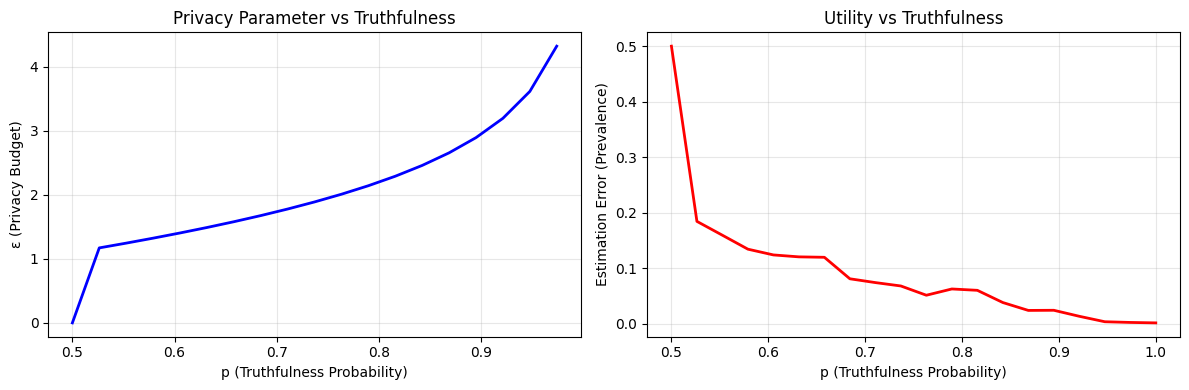


Privacy-Utility Trade-off Table:
       p        ε   Privacy  Utility Error
0.500000 0.000000  1.000000       0.500000
0.526316 1.170071  3.222222       0.184420
0.552632 1.244324  3.470588       0.159467
0.578947 1.321756  3.750000       0.134364
0.605263 1.402824  4.066667       0.124000
0.631579 1.488077  4.428571       0.120517
0.657895 1.578185  4.846154       0.119744
0.684211 1.673976  5.333333       0.081031
0.710526 1.776492  5.909091       0.074178
0.736842 1.887070  6.600000       0.068086
0.763158 2.007468  7.444444       0.051407
0.789474 2.140066  8.500000       0.062693
0.815789 2.288196  9.857143       0.060258
0.842105 2.456736 11.666667       0.038263
0.868421 2.653242 14.200000       0.024048
0.894737 2.890372 18.000000       0.024306
0.921053 3.191847 24.333333       0.013474
0.947368 3.610918 37.000000       0.003667
0.973684 4.317488 75.000000       0.002400
1.000000      inf       inf       0.001600


In [ ]:
# Vary p and measure privacy and utility
p_values = np.linspace(0.5, 1.0, 20)
metrics = []

true_prev = 0.3
np.random.seed(42)

for p in p_values:
    if p == 0.5:
        eps = 0
    else:
        eps = np.log((1 + p) / (1 - p))

    # Simulate
    true_answers = np.random.rand(5000) < true_prev
    observed = np.array([
        warner_randomized_response(a, p) for a in true_answers
    ])
    observed_prev = observed.mean()

    # Utility: mean squared error in prevalence estimation
    estimated = estimate_true_prevalence(observed_prev, p)
    if estimated is not None:
        utility_error = abs(estimated - true_prev)
    else:
        utility_error = 0.5  # Maximum error for p=0.5

    metrics.append({
        'p': p,
        'ε': eps,
        'Privacy': np.exp(eps),
        'Utility Error': utility_error
    })

metrics_df = pd.DataFrame(metrics)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(metrics_df['p'], metrics_df['ε'], 'b-', linewidth=2)
ax1.set_xlabel('p (Truthfulness Probability)')
ax1.set_ylabel('ε (Privacy Budget)')
ax1.set_title('Privacy Parameter vs Truthfulness')
ax1.grid(True, alpha=0.3)

ax2.plot(metrics_df['p'], metrics_df['Utility Error'], 'r-', linewidth=2)
ax2.set_xlabel('p (Truthfulness Probability)')
ax2.set_ylabel('Estimation Error (Prevalence)')
ax2.set_title('Utility vs Truthfulness')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nPrivacy-Utility Trade-off Table:")
print(metrics_df.to_string(index=False))


Lab 3: Laplace Mechanism for Numeric Queries

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import laplace as laplace_dist

def laplace_mechanism(true_value, sensitivity, epsilon):
    """
    Laplace Mechanism for Differential Privacy

    Args:
        true_value: Actual query result
        sensitivity: Global sensitivity of the query
        epsilon: Privacy parameter

    Returns:
        noisy_value: Differentially private result
    """
    scale = sensitivity / epsilon
    noise = np.random.laplace(loc=0, scale=scale)
    return true_value + noise

# Create synthetic hospital dataset
np.random.seed(42)
n_patients = 1000

# Ages: realistic distribution
ages = np.random.normal(loc=45, scale=20, size=n_patients)
ages = np.clip(ages, 18, 95).astype(int)

df = pd.DataFrame({'age': ages})

print("Hospital Database Statistics (TRUE, NON-PRIVATE):")
print(f"Count: {len(df)}")
print(f"Mean Age: {df['age'].mean():.2f}")
print(f"Std Dev: {df['age'].std():.2f}")
print(f"Min Age: {df['age'].min()}")
print(f"Max Age: {df['age'].max()}")

# Compute sensitivities for each query
count_sensitivity = 1  # Adding one person changes count by 1
mean_sensitivity = (df['age'].max() - df['age'].min()) / len(df)  # ~0.077

print(f"\n=== Sensitivity Analysis ===")
print(f"Count sensitivity: {count_sensitivity}")
print(f"Mean sensitivity (Age Range/n): {mean_sensitivity:.4f}")


Hospital Database Statistics (TRUE, NON-PRIVATE):
Count: 1000
Mean Age: 45.51
Std Dev: 18.22
Min Age: 18
Max Age: 95

=== Sensitivity Analysis ===
Count sensitivity: 1
Mean sensitivity (Age Range/n): 0.0770


Single Query with DP


In [ ]:
# Release count with ε=1.0
epsilon = 1.0
true_count = len(df)
noisy_count = laplace_mechanism(true_count, count_sensitivity, epsilon)

print(f"Query: COUNT(*)")
print(f"True count: {true_count}")
print(f"Noisy count (ε={epsilon}): {noisy_count:.1f}")
print(f"Error: {abs(noisy_count - true_count):.1f}")

# Now mean age
true_mean = df['age'].mean()
noisy_mean = laplace_mechanism(true_mean, mean_sensitivity, epsilon)

print(f"\nQuery: MEAN(age)")
print(f"True mean: {true_mean:.2f}")
print(f"Noisy mean (ε={epsilon}): {noisy_mean:.2f}")
print(f"Error: {abs(noisy_mean - true_mean):.2f}")

Query: COUNT(*)
True count: 1000
Noisy count (ε=1.0): 998.9
Error: 1.1

Query: MEAN(age)
True mean: 45.51
Noisy mean (ε=1.0): 45.39
Error: 0.12


Multiple Queries & Budget Exhaustion


In [ ]:
# Total privacy budget
total_epsilon = 1.0

# Allocate budget across queries
epsilon_queries = [0.3, 0.3, 0.2, 0.2]
queries = [
    ('COUNT(*)', true_count, count_sensitivity),
    ('MEAN(age)', true_mean, mean_sensitivity),
    ('MIN(age)', df['age'].min(), (df['age'].max() - df['age'].min())),
    ('MAX(age)', df['age'].max(), (df['age'].max() - df['age'].min())),
]

print("=== Multiple Queries with Privacy Budget ===\n")
print(f"Total Budget: ε = {total_epsilon}\n")

results = []
accumulated_epsilon = 0

for (query_name, true_val, sens), eps in zip(queries, epsilon_queries):
    accumulated_epsilon += eps

    if accumulated_epsilon > total_epsilon:
        print(f"⚠ {query_name}: BUDGET EXHAUSTED! (Would need {accumulated_epsilon:.2f})")
        break

    noisy_val = laplace_mechanism(true_val, sens, eps)
    error = abs(noisy_val - true_val)

    print(f"{query_name}")
    print(f"  True:  {true_val:.2f}")
    print(f"  Noisy: {noisy_val:.2f}")
    print(f"  Error: {error:.2f}")
    print(f"  ε used: {eps:.2f} (Total: {accumulated_epsilon:.2f})\n")

    results.append({
        'Query': query_name,
        'True Value': true_val,
        'Noisy Value': noisy_val,
        'Error': error,
        'ε Used': eps,
        'Accumulated ε': accumulated_epsilon
    })

results_df = pd.DataFrame(results)
print("Summary:")
print(results_df.to_string(index=False))

=== Multiple Queries with Privacy Budget ===

Total Budget: ε = 1.0

COUNT(*)
  True:  1000.00
  Noisy: 1001.06
  Error: 1.06
  ε used: 0.30 (Total: 0.30)

MEAN(age)
  True:  45.51
  Noisy: 45.65
  Error: 0.14
  ε used: 0.30 (Total: 0.60)

MIN(age)
  True:  18.00
  Noisy: -1045.33
  Error: 1063.33
  ε used: 0.20 (Total: 0.80)

MAX(age)
  True:  95.00
  Noisy: 887.73
  Error: 792.73
  ε used: 0.20 (Total: 1.00)

Summary:
    Query  True Value  Noisy Value       Error  ε Used  Accumulated ε
 COUNT(*)     1000.00  1001.062123    1.062123     0.3            0.3
MEAN(age)       45.51    45.646713    0.136713     0.3            0.6
 MIN(age)       18.00 -1045.327469 1063.327469     0.2            0.8
 MAX(age)       95.00   887.733046  792.733046     0.2            1.0


Exploration: Epsilon and Accuracy Trade-off

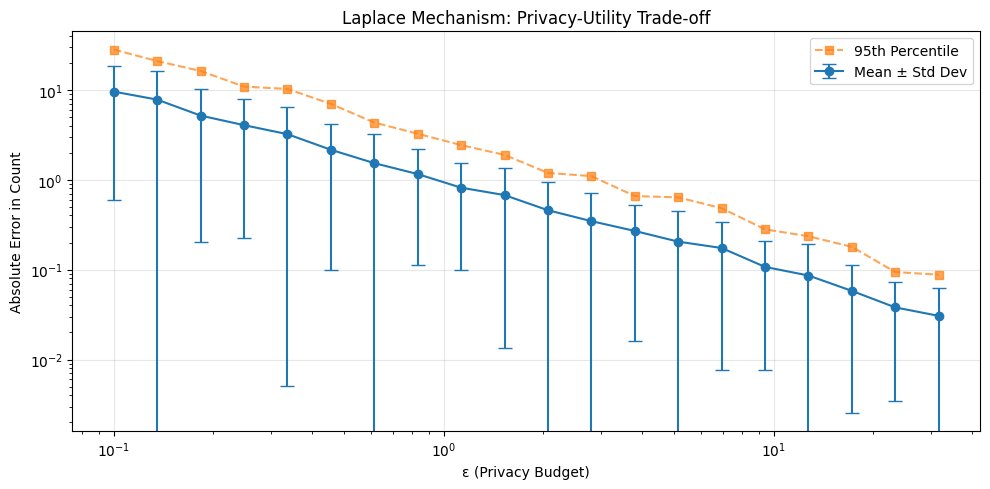

  epsilon  mean_error  std_error  p95_error
 0.100000    9.561745   8.963739  28.101416
 0.135388    7.786554   8.424986  20.887528
 0.183298    5.173955   4.972625  16.227348
 0.248163    4.048021   3.825096  10.868135
 0.335982    3.214753   3.209744  10.229802
 0.454878    2.154971   2.055333   6.979774
 0.615848    1.529263   1.684919   4.327904
 0.833782    1.156355   1.044423   3.248838
 1.128838    0.815753   0.716582   2.426718
 1.528307    0.674724   0.661155   1.890166
 2.069138    0.457762   0.481998   1.190567
 2.801357    0.346327   0.357582   1.097166
 3.792690    0.269224   0.253152   0.658938
 5.134833    0.204739   0.242582   0.636200
 6.951928    0.173964   0.166321   0.482049
 9.412050    0.107147   0.099519   0.280610
12.742750    0.085987   0.107320   0.235115
17.252105    0.057966   0.055423   0.178953
23.357215    0.037983   0.034557   0.093909
31.622777    0.030580   0.031410   0.087802


In [ ]:
# Fix query (COUNT) and vary epsilon
epsilon_values = np.logspace(-1, 1.5, 20)  # 0.1 to ~30
n_trials = 100

accuracy_metrics = []

for eps in epsilon_values:
    errors = []

    for _ in range(n_trials):
        noisy = laplace_mechanism(true_count, count_sensitivity, eps)
        error = abs(noisy - true_count)
        errors.append(error)

    accuracy_metrics.append({
        'epsilon': eps,
        'mean_error': np.mean(errors),
        'std_error': np.std(errors),
        'p95_error': np.percentile(errors, 95)
    })

accuracy_df = pd.DataFrame(accuracy_metrics)

# Visualization
fig, ax = plt.subplots(figsize=(10, 5))

ax.errorbar(accuracy_df['epsilon'],
            accuracy_df['mean_error'],
            yerr=accuracy_df['std_error'],
            fmt='o-', capsize=5, label='Mean ± Std Dev')
ax.plot(accuracy_df['epsilon'], accuracy_df['p95_error'],
        's--', label='95th Percentile', alpha=0.7)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('ε (Privacy Budget)')
ax.set_ylabel('Absolute Error in Count')
ax.set_title('Laplace Mechanism: Privacy-Utility Trade-off')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(accuracy_df.to_string(index=False))

Lab 4: Privacy Budget & Composition

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Queries with different priorities
queries = [
    {'name': 'Total Count', 'priority': 5, 'estimated_eps': 0.05},
    {'name': 'Mean Income', 'priority': 4, 'estimated_eps': 0.10},
    {'name': 'Age Distribution', 'priority': 3, 'estimated_eps': 0.10},
    {'name': 'Disease Prevalence', 'priority': 5, 'estimated_eps': 0.15},
    {'name': 'Gender Ratio', 'priority': 2, 'estimated_eps': 0.05},
    {'name': 'Employment Status', 'priority': 3, 'estimated_eps': 0.10},
    {'name': 'Income Distribution', 'priority': 3, 'estimated_eps': 0.15},
    {'name': 'Marital Status', 'priority': 1, 'estimated_eps': 0.05},
    {'name': 'Education Level', 'priority': 2, 'estimated_eps': 0.10},
    {'name': 'Region Statistics', 'priority': 2, 'estimated_eps': 0.10},
]

total_budget = 1.0
allocated_epsilon = []
queries_approved = []
cumulative_eps = 0

print("=== Privacy Budget Allocation (Sequential Composition) ===\n")
print(f"Total Budget: ε = {total_budget}\n")
print(f"{'#':<3} {'Query':<25} {'Priority':<10} {'ε Requested':<15} {'Status':<15} {'Cumulative ε':<15}")
print("-" * 83)

for i, q in enumerate(queries, 1):
    requested_eps = q['estimated_eps']
    if cumulative_eps + requested_eps <= total_budget:
        cumulative_eps += requested_eps
        status = "APPROVED ✓"
        queries_approved.append(q['name'])
    else:
        status = "REJECTED ✗"

    print(f"{i:<3} {q['name']:<25} {q['priority']:<10} {requested_eps:<15.3f} {status:<15} {cumulative_eps:<15.3f}")

print(f"\n=== Summary ===")
print(f"Queries Approved: {len(queries_approved)}/{len(queries)}")
print(f"Remaining Budget: {total_budget - cumulative_eps:.3f}")
print(f"\nApproved Queries:")
for q in queries_approved:
    print(f"  • {q}")



=== Privacy Budget Allocation (Sequential Composition) ===

Total Budget: ε = 1.0

#   Query                     Priority   ε Requested     Status          Cumulative ε   
-----------------------------------------------------------------------------------
1   Total Count               5          0.050           APPROVED ✓      0.050          
2   Mean Income               4          0.100           APPROVED ✓      0.150          
3   Age Distribution          3          0.100           APPROVED ✓      0.250          
4   Disease Prevalence        5          0.150           APPROVED ✓      0.400          
5   Gender Ratio              2          0.050           APPROVED ✓      0.450          
6   Employment Status         3          0.100           APPROVED ✓      0.550          
7   Income Distribution       3          0.150           APPROVED ✓      0.700          
8   Marital Status            1          0.050           APPROVED ✓      0.750          
9   Education Level           2 

Basic vs Advanced Composition

In [ ]:
# Scenario: Analyst wants to run k queries, each with ε_i = ε/k
k_values = np.array([1, 2, 5, 10, 20, 50, 100])
per_query_epsilon = 0.1  # ε_i = 0.1 for each query

basic_total = k_values * per_query_epsilon  # Simple: sum them up
advanced_total = per_query_epsilon * np.sqrt(2 * k_values * np.log(1/0.01))  # Advanced (with δ)

comparison = pd.DataFrame({
    'Number of Queries': k_values,
    'Per-Query ε': per_query_epsilon,
    'Basic Composition (ε₁ + ε₂ + ...)': basic_total,
    'Advanced Composition (√k)': advanced_total,
    'Improvement Factor': basic_total / advanced_total
})

print("=== Composition Rules Comparison ===\n")
print(comparison.to_string(index=False))
print("\n--- Interpretation ---")
print("Basic: ε_total = k * ε_i (linear growth)")
print("Advanced: ε_total ≈ ε_i * √k (square-root growth)")
print("Improvement: Advanced is better by factor shown above")

=== Composition Rules Comparison ===

 Number of Queries  Per-Query ε  Basic Composition (ε₁ + ε₂ + ...)  Advanced Composition (√k)  Improvement Factor
                 1          0.1                                0.1                   0.303485            0.329505
                 2          0.1                                0.2                   0.429193            0.465991
                 5          0.1                                0.5                   0.678614            0.736796
                10          0.1                                1.0                   0.959705            1.041987
                20          0.1                                2.0                   1.357228            1.473592
                50          0.1                                5.0                   2.145966            2.329953
               100          0.1                               10.0                   3.034854            3.295051

--- Interpretation ---
Basic: ε_total = k * ε_i (

Budget Management Strategy

In [ ]:
def allocate_budget_by_priority(queries_list, total_budget, composition='basic'):
    """
    Allocate privacy budget proportional to priority

    Args:
        queries_list: List of dicts with 'name' and 'priority' keys
        total_budget: Total ε available
        composition: 'basic' or 'advanced'

    Returns:
        allocation: DataFrame with allocations
    """
    priorities = np.array([q['priority'] for q in queries_list])

    # Allocate proportionally
    allocations = (priorities / priorities.sum()) * total_budget

    result = []
    cumulative = 0

    for q, alloc in zip(queries_list, allocations):
        cumulative += alloc
        result.append({
            'Query': q['name'],
            'Priority': q['priority'],
            'Allocated ε': alloc,
            'Cumulative ε': cumulative,
            'Status': 'OK' if cumulative <= total_budget else 'EXCEEDED'
        })

    return pd.DataFrame(result)

# Sample queries
sample_queries = [
    {'name': 'Critical Health Stats', 'priority': 5},
    {'name': 'Demographic Summary', 'priority': 4},
    {'name': 'Regional Breakdown', 'priority': 3},
    {'name': 'Exploratory Analysis', 'priority': 1},
]

allocation = allocate_budget_by_priority(sample_queries, 1.0)
print("Budget Allocation Strategy:\n")
print(allocation.to_string(index=False))

Budget Allocation Strategy:

                Query  Priority  Allocated ε  Cumulative ε Status
Critical Health Stats         5     0.384615      0.384615     OK
  Demographic Summary         4     0.307692      0.692308     OK
   Regional Breakdown         3     0.230769      0.923077     OK
 Exploratory Analysis         1     0.076923      1.000000     OK
